In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# EX1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = df.set_index('hn')

In [4]:
df.isnull().any()

age           False
parity        False
hiv            True
menopaus       True
disease       False
surgery       False
conization     True
OPDsize        True
appearance     True
stage          True
pchemo         True
Wardsize       True
finalhisto     True
nodeyiel       True
RHlvsi         True
depth          True
size           True
utmet          True
vgmargin       True
vgmet          True
pelvicme       True
pmmet          True
adnmet         True
dtype: bool

In [5]:
df_missing = df
df_missing = df_missing.dropna(0,'any')
df_missing

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2450167,67,5,0.0,1.0,1,0,0.0,3.0,2.0,4.0,...,34.0,38.0,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,0.0,1.0,1,1,1.0,0.0,5.0,4.0,...,18.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3813471,42,2,0.0,0.0,1,0,0.0,3.0,2.0,4.0,...,33.0,999.0,3.0,2.7,0.0,2.0,1.0,1.0,1.0,0.0
3812935,53,1,0.0,1.0,1,0,1.0,0.0,5.0,4.0,...,17.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df_unnecessary = df_missing.drop(['hiv', 'size', 'utmet', 'vgmet', 'surgery', 'pchemo'], axis=1)
df_unnecessary

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,55,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,67,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,42,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,53,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [7]:
df_change_age = df_unnecessary
df_change_age.loc[df_change_age['age'] <= 20,'age'] = 'Young'
df_change_age.loc[df_change_age['age'] > 20,'age'] = 'Old'
df_change_age

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [8]:
df_pm0 = df_change_age.loc[df_change_age['pmmet'] == 0.0]
df_pm0

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810768,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0
3812586,Old,2,1.0,1,0.0,3.0,1.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,0.0
3807672,Old,7,0.0,1,0.0,4.0,1.0,4.0,4.0,2.0,17.0,1.0,3.0,0.0,0.0,0.0,0.0


In [9]:
df_pm1 = df_change_age.loc[df_change_age['pmmet'] == 1.0]
df_pm1

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2635600,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,18.0,10.0,3.0,0.0,1.0,1.0,2.0
2634755,Old,2,0.0,0,0.0,4.0,4.0,4.0,4.0,1.0,20.0,999.0,3.0,0.0,1.0,1.0,0.0
2647653,Old,1,0.0,1,0.0,6.0,1.0,5.0,6.0,1.0,14.0,5.0,3.0,0.0,1.0,1.0,0.0
2648037,Old,2,0.0,0,0.0,2.0,1.0,6.0,2.0,1.0,28.0,1.0,3.0,0.0,0.0,1.0,0.0
2657353,Old,5,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,26.0,10.0,3.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484711,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,2.0,10.0,999.0,3.0,0.0,1.0,1.0,0.0
3810771,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,23.0,10.0,3.0,0.0,0.0,1.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0


In [10]:
pm0_10 = df_pm0.sample(10)
pm0_10


,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2583140,Old,3,0.0,0,0.0,2.0,2.0,4.0,3.0,1.0,35.0,999.0,3.0,0.0,0.0,0.0,0.0
2861506,Old,1,0.0,1,0.0,4.0,1.0,5.0,5.0,2.0,17.0,0.0,3.0,0.0,0.0,0.0,0.0
2011275,Old,0,1.0,1,0.0,2.0,2.0,4.0,1.0,1.0,27.0,4.0,3.0,0.0,1.0,0.0,0.0
2144625,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,2.0,31.0,0.0,3.0,0.0,1.0,0.0,2.0
3263070,Old,1,1.0,1,0.0,2.0,2.0,6.0,2.5,2.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0
2743934,Old,1,1.0,0,0.0,2.0,2.0,4.0,0.0,1.0,48.0,0.0,3.0,0.0,0.0,0.0,0.0
3300594,Old,1,0.0,1,1.0,0.0,5.0,4.0,0.0,4.0,45.0,2.0,2.0,0.0,0.0,0.0,2.0
3309652,Old,2,0.0,0,0.0,1.0,1.0,4.0,1.0,2.0,22.0,3.0,3.0,0.0,0.0,0.0,2.0
3169688,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,42.0,5.0,2.0,0.0,0.0,0.0,2.0


In [11]:
pm1_10 = df_pm1.sample(10)
pm1_10

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3112916,Old,2,0.0,0,0.0,2.0,5.0,4.0,3.0,1.0,46.0,999.0,3.0,1.0,1.0,1.0,0.0
3563913,Old,0,0.0,0,0.0,3.0,1.0,4.0,3.5,1.0,27.0,999.0,3.0,0.0,1.0,1.0,0.0
3071835,Old,2,0.0,0,0.0,4.0,2.0,4.0,4.0,1.0,17.0,999.0,3.0,0.0,1.0,1.0,0.0
2607178,Old,2,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,24.0,999.0,3.0,0.0,1.0,1.0,0.0
3020159,Old,2,0.0,0,1.0,2.0,2.0,4.0,2.0,1.0,23.0,4.0,3.0,1.0,0.0,1.0,2.0
2788309,Old,3,0.0,0,0.0,2.0,2.0,4.0,3.0,2.0,40.0,0.0,3.0,0.0,0.0,1.0,0.0
3536979,Old,2,1.0,1,0.0,3.0,2.0,6.0,2.0,2.0,32.0,3.0,3.0,0.0,1.0,1.0,0.0
3363264,Old,4,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,24.0,999.0,3.0,0.0,0.0,1.0,0.0
3405979,Old,2,0.0,1,0.0,2.0,4.0,4.0,2.5,1.0,53.0,999.0,3.0,0.0,1.0,1.0,0.0


# EX2

<AxesSubplot:xlabel='appearance'>

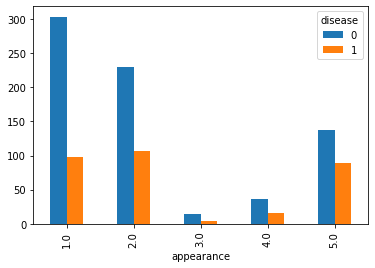

In [15]:
pd.crosstab(df_unnecessary['appearance'],df_unnecessary['disease']).plot(kind='bar')

<AxesSubplot:xlabel='pmmet'>

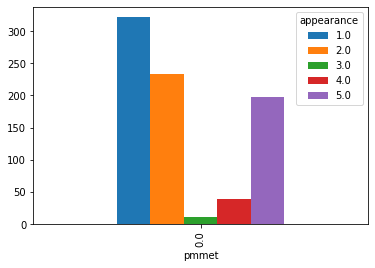

In [22]:
pd.crosstab(df_pm0['pmmet'],df_pm0['appearance']).plot(kind='bar')

<AxesSubplot:xlabel='pmmet'>

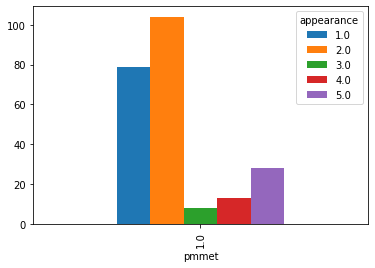

In [23]:
pd.crosstab(df_pm1['pmmet'],df_pm1['appearance']).plot(kind='bar')

<AxesSubplot:xlabel='age'>

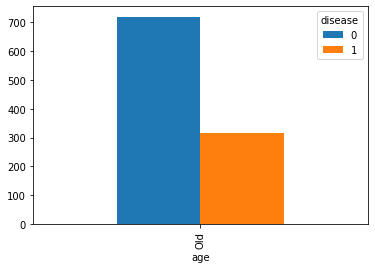

In [26]:
pd.crosstab(df_unnecessary['age'],df_unnecessary['disease']).plot(kind='bar')

<AxesSubplot:xlabel='stage'>

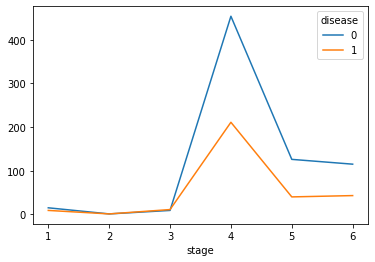

In [28]:
pd.crosstab(df_unnecessary['stage'],df_unnecessary['disease']).plot(kind='line')